## Importation des bibliotheques necessaires

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

## Creation du DataFrame principal

In [58]:
elec2013 = pd.read_csv('donnees_elec_2013.csv', encoding='latin_1', sep = ',')
elec2014 = pd.read_csv('donnees_elec_2014.csv', encoding='latin_1', sep = ',')
elec2015 = pd.read_csv('donnees_elec_2015.csv', encoding='latin_1', sep = ',')
elec2016 = pd.read_csv('donnees_elec_2016.csv', encoding='latin_1', sep = ',')
elec2017 = pd.read_csv('donnees_elec_2017.csv', encoding='latin_1', sep = ',')

In [36]:
elec13_17 = 

,OPERATEUR,ANNEE,FILIERE,TYPE,CODE,CONSOA,PDLA,INDQUALA,CONSOI,PDLI,...,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33
0,SRD,2017,E,Region,24,0,0,0,0,900000,...,500000,0.0,0.0,0,0,0,0,0,0.0,500000.0
1,SRD,2017,E,Region,75,0,0,0,0,900000,...,500000,0.0,0.0,0,0,0,0,0,0.0,500000.0


## Nous allons nous debarasser des colonnes sans nom puisque nous ne savons pas a quoi ca correspond

In [37]:
elec.drop(elec.iloc[:, 22:34], inplace = True, axis = 1)

In [38]:
elec.head(5)

,OPERATEUR,ANNEE,FILIERE,TYPE,CODE,CONSOA,PDLA,INDQUALA,CONSOI,PDLI,...,PDLT,INDQUALT,CONSOR,PDLR,INDQUALR,THERMOR,PARTR,CONSONA,PDLNA,INDQUALNA
0,SRD,2017,E,Region,24,0,0,0,0,900000,...,0,0,900000,0,0,0,0,900000,62,37
1,SRD,2017,E,Region,75,0,0,0,0,900000,...,0,0,900000,0,0,0,0,900000,454,22
2,SICAE dEure-et-Loir et des Yvelines,2017,E,Region,11,0,0,0,0,0,...,0,0,0,0,0,0,0,0,648,0
3,SICAE dEure-et-Loir et des Yvelines,2017,E,Region,24,0,0,0,0,0,...,0,0,0,0,0,0,0,0,358,0
4,SEML Energies et Services de Seyssel,2017,E,Region,84,0,0,0,0,0,...,0,0,0,0,0,0,0,0,607,0


In [53]:
elec['CONSOR'].sum()

23718681830

In [39]:
conso = pd.DataFrame()
conso = elec[['CONSOA', 'CONSOI', 'CONSOT', 'CONSOR', 'CONSONA']]
conso.head(5)

,CONSOA,CONSOI,CONSOT,CONSOR,CONSONA
0,0,0,0,900000,900000
1,0,0,0,900000,900000
2,0,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,0


In [59]:
total_a = conso['CONSOA'].sum()
total_i = conso['CONSOI'].sum()
total_t = conso['CONSOT'].sum()
total_r = conso['CONSOR'].sum()
total_n = conso['CONSONA'].sum()

In [44]:
total_r

23718681830

In [46]:
total_i

1192

In [47]:
totaux = [total_a, total_i, total_t, total_r, total_n]
total_ensemble = 0
for total in totaux:
    total_ensemble += total

In [48]:
def get_relatifs(liste, T):
    relatifs = []
    for element in liste:
        element = element * 100 / T
        relatifs.append(element)
    return relatifs


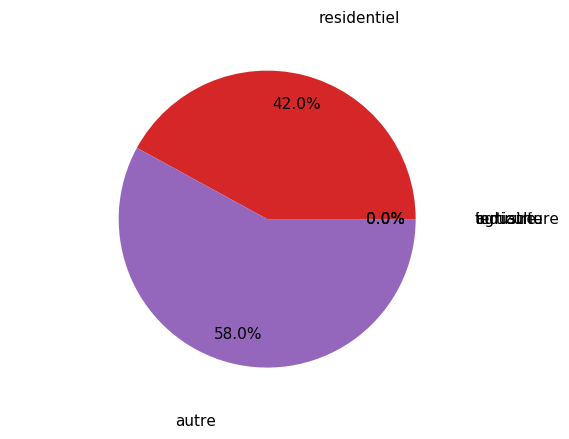

In [49]:
domaines = ['agriculture', 'industrie', 'tertiaire', 'residentiel', 'autre']
exp = [0, 0, 0, 0, 0]
plt.figure(dpi=110)
plt.pie(get_relatifs(totaux, total_ensemble), labels=domaines, explode=exp, autopct='%1.1f%%', startangle=0, labeldistance=1.4, pctdistance=0.8)
plt.axis('equal')
plt.show()

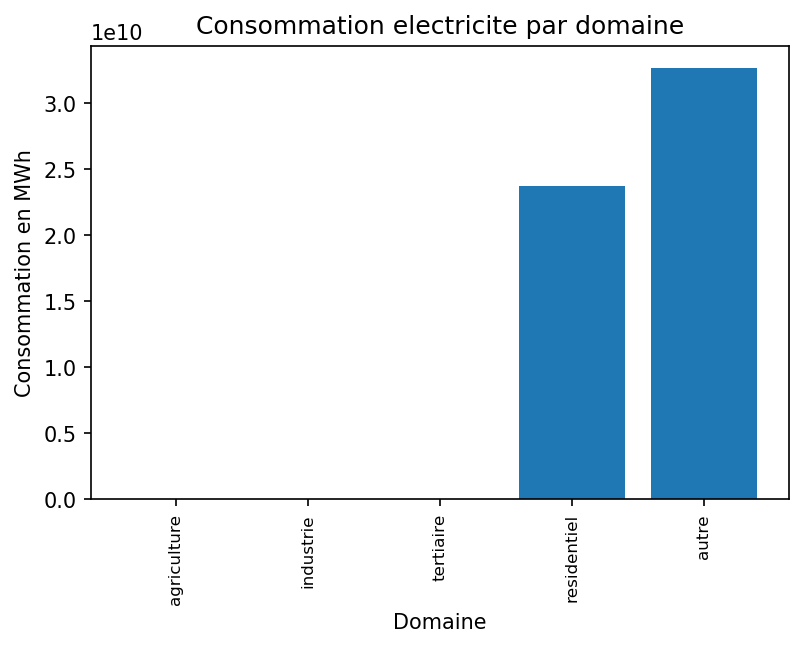

In [50]:
plt.figure(dpi=150)
plt.bar(domaines, totaux)
plt.xticks(domaines, rotation='90', fontsize=8)
plt.xlabel('Domaine')
plt.ylabel('Consommation en MWh')
plt.title('Consommation electricite par domaine')
plt.show()

In [61]:
totaux_dict = dict(zip(domaines, totaux))
totaux_dict

{'agriculture': 3572605,
 'industrie': 1192,
 'tertiaire': 1290562,
 'residentiel': 23718681830,
 'autre': 32716187830}